In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,StandardScaler

In [5]:
df = pd.read_csv('/content/Churn_Modelling.csv')

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier


In [7]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

In [8]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


Removing irrelevant column

In [14]:
print(df.columns)

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')


In [18]:

df = df.drop("Surname", axis=1)
df = df.drop("RowNumber",axis=1)
display(df.head())

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Class Imbalance


In [21]:
target_var = 'Exited'

class_counts = df[target_var].value_counts()
print("Class Counts:\n", class_counts)

class_per = df[target_var].value_counts(normalize=True) * 100
print("\nClass Percentages:\n", class_per)


Class Counts:
 Exited
0    7963
1    2037
Name: count, dtype: int64

Class Percentages:
 Exited
0    79.63
1    20.37
Name: proportion, dtype: float64


/tmp/ipython-input-3569681852.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=target_var, data=df, palette='viridis')


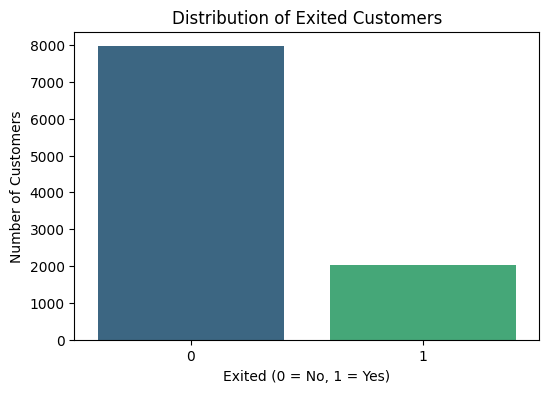

In [22]:
plt.figure(figsize=(6, 4))
sns.countplot(x=target_var, data=df, palette='viridis')
plt.title('Distribution of Exited Customers')
plt.xlabel('Exited (0 = No, 1 = Yes)')
plt.ylabel('Number of Customers')
plt.show()

Feature Engineering

In [20]:
df["Gender"] = df["Gender"].map({"Male": 0, "Female": 1})
df["Geography"] = df["Geography"].map({"France": 0, "Spain": 1, "Germany": 2})


Derived Features (Average Balance per product And Age groups)

In [25]:
avg_bal_per_prod = df.groupby('NumOfProducts')['Balance'].mean().reset_index()
print("Average Balance per Product Category:")
print(avg_bal_per_prod)

Average Balance per Product Category:
   NumOfProducts       Balance
0              1  98551.870614
1              2  51879.145813
2              3  75458.328195
3              4  93733.135000


/tmp/ipython-input-4158639777.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='NumOfProducts', y='Balance', data=avg_bal_per_prod, palette='viridis')


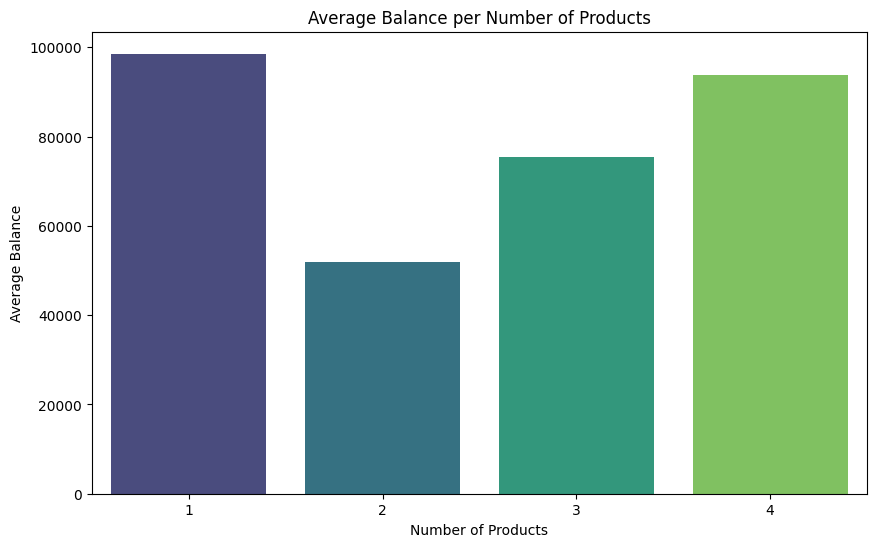

In [27]:
plt.figure(figsize=(10, 6))
sns.barplot(x='NumOfProducts', y='Balance', data=avg_bal_per_prod, palette='viridis')
plt.title('Average Balance per Number of Products')
plt.xlabel('Number of Products')
plt.ylabel('Average Balance')
plt.show()

In [28]:
bins = [18, 30, 40, 50, 60, 100]
labels = ['Young Adult', 'Adult', 'Middle-Aged', 'Senior', 'Elder']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)
display(df.head())

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,AgeGroup
0,619,0,NaN,42,2,0.00,1,1,1,101348.88,1,Middle-Aged
1,608,1,NaN,41,1,83807.86,1,0,1,112542.58,0,Middle-Aged
2,502,0,NaN,42,8,159660.80,3,1,0,113931.57,1,Middle-Aged
3,699,0,NaN,39,1,0.00,2,0,0,93826.63,0,Adult
4,850,1,NaN,43,2,125510.82,1,1,1,79084.10,0,Middle-Aged


In [29]:
# avg_balance_by_age_group = df.groupby('AgeGroup')['Balance'].mean().reset_index()
# print("Average Balance per Age Group:")
# print(avg_balance_by_age_group)

Average Balance per Age Group:
      AgeGroup       Balance
0  Young Adult  73698.718635
1        Adult  75071.796781
2  Middle-Aged  78479.240768
3       Senior  83632.942486
4        Elder  75136.097795


/tmp/ipython-input-4082209044.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_balance_by_age_group = df.groupby('AgeGroup')['Balance'].mean().reset_index()


In [31]:
df.info()
#No class Imbalance were found

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   CreditScore      10000 non-null  int64   
 1   Geography        10000 non-null  int64   
 2   Gender           0 non-null      float64 
 3   Age              10000 non-null  int64   
 4   Tenure           10000 non-null  int64   
 5   Balance          10000 non-null  float64 
 6   NumOfProducts    10000 non-null  int64   
 7   HasCrCard        10000 non-null  int64   
 8   IsActiveMember   10000 non-null  int64   
 9   EstimatedSalary  10000 non-null  float64 
 10  Exited           10000 non-null  int64   
 11  AgeGroup         10000 non-null  category
dtypes: category(1), float64(3), int64(8)
memory usage: 869.5 KB


Model Building

In [33]:

X = df.drop("Exited", axis=1)
X = df.drop("AgeGroup", axis=1)
y = df["Exited"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/extmath.py:1101: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/usr/local/lib/python3.12/dist-packages/sklearn/utils/extmath.py:1106: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/usr/local/lib/python3.12/dist-packages/sklearn/utils/extmath.py:1126: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


In [39]:
X = df.drop(['Exited', 'Gender'], axis=1)
y = df['Exited']

X = pd.get_dummies(X, columns=['AgeGroup'], drop_first=True)

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

In [40]:
#Training the model by splitting the dataset into 80% for training and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

In [41]:
model1=LogisticRegression(random_state=42)
model1.fit(X_train,y_train)
y_pred = model1.predict(X_test)

In [46]:
accuracy1= model1.score(X_test,y_test)
print("Accuracy: ",accuracy1)

Accuracy:  0.825


In [45]:
model2=RandomForestClassifier(random_state=42)
model2.fit(X_train,y_train)
y_pred = model2.predict(X_test)

In [47]:
accuracy2= model2.score(X_test,y_test)
print("Accuracy: ",accuracy2)

Accuracy:  0.864


Feature Importance

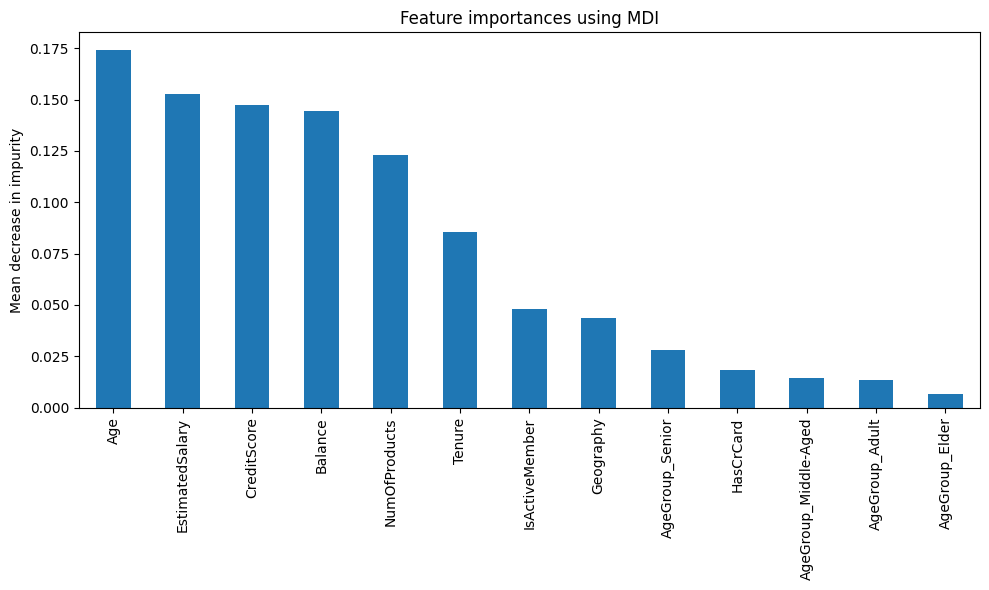

In [52]:
importances = model2.feature_importances_
feature_names = X.columns

forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots(figsize=(10, 6))
forest_importances.sort_values(ascending=False).plot.bar(ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()
plt.show()

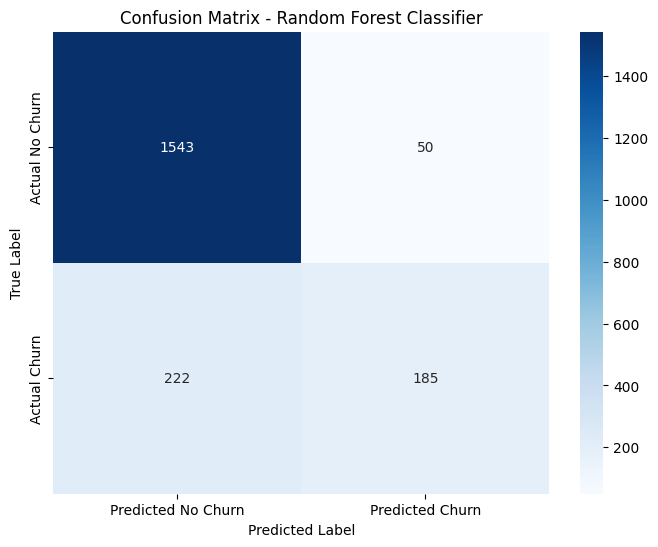

In [53]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred_rf = model2.predict(X_test)
cm_rf = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted No Churn', 'Predicted Churn'],
            yticklabels=['Actual No Churn', 'Actual Churn'])
plt.title('Confusion Matrix - Random Forest Classifier')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

Model Accuracies

                 Model  Accuracy
0  Logistic Regression     0.825
1        Random Forest     0.864


/tmp/ipython-input-3516286552.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Accuracy', data=model_accuracy, palette='viridis')


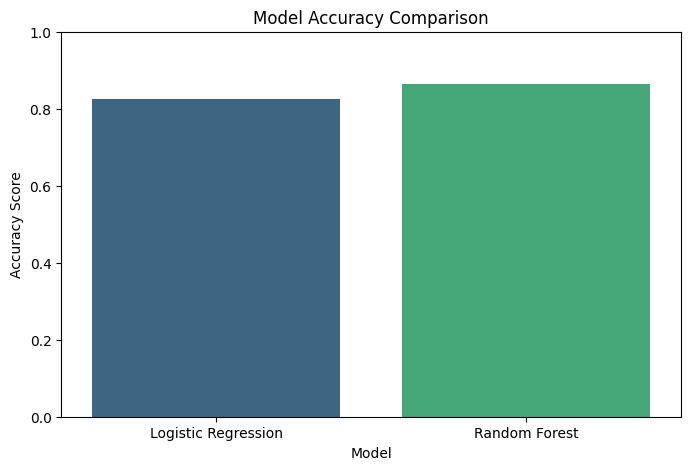

In [49]:
model_accuracy = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest'],
    'Accuracy': [accuracy1, accuracy2]
})

print(model_accuracy)

plt.figure(figsize=(8, 5))
sns.barplot(x='Model', y='Accuracy', data=model_accuracy, palette='viridis')
plt.title('Model Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy Score')
plt.ylim(0, 1) # Accuracy scores are between 0 and 1
plt.show()

Business Insights

Model Performance Summary:

1.Logistic Regression Model: Achieved an accuracy of approximately 0.825 (82.5%).

2.Random Forest Model: Achieved a higher accuracy of approximately 0.864 (86.4%).

Key Takeaway: The Random Forest Classifier performed better than the Logistic Regression model in predicting customer churn based on accuracy score. While accuracy is a good initial metric, for churn prediction, it's often beneficial to consider other metrics like precision, recall, and F1-score, especially when dealing with potential class imbalance.

Recommended Next Steps for a Comprehensive Summary:

To provide a full summary including key factors driving churn, at-risk customer segments, and actionable retention recommendations, I suggest we proceed with:

Feature Importance Analysis:

 To identify the most influential factors contributing to customer churn.

Detailed Model Evaluation:

 To gain a more nuanced understanding of model performance using metrics beyond accuracy (e.g., precision, recall, F1-score, ROC-AUC), and to analyze false positives and false negatives.

Segment Analysis:

 To identify specific customer segments at the highest risk of churn, based on feature importance and detailed model insights, and then formulate targeted retention strategies.